In [1]:
#%load_ext autoreload
#%autoreload 2
from keras.layers import Input, Dense
from keras.models import Model
from AutoEncoderMLP import AutoEncoderMLP
from keras.datasets import mnist 
import numpy as np
from keras.callbacks import ModelCheckpoint
import copy
import matplotlib.pyplot as plt
#(x_train,_),(x_test,_)=mnist.load_data()

# this is the size of our encoded representations
#encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
#input_img = Input(shape=(784,))
#print input_img
# "encoded" is the encoded representation of the input
#encoded = Dense(128, activation='relu' )(input_img)
#print encoded.shape[1:]
#encoded = Dense(128, activation='relu' )(encoded)
#encoded = Dense(64, activation='relu' )(encoded)
#encoded = Dense(32, activation='relu' )(encoded)
# "decoded" is the lossy reconstruction of the input
#decoded1 = Dense(64, activation='relu')(encoded)
#decoded2 = Dense(128, activation='relu')(decoded1)
#decoded = Dense(784, activation='sigmoid')(decoded2)

Using TensorFlow backend.


## Flattening the mnist images into array of 784* in order to fit to our MLP

In [2]:
(x_trainO,_),(x_testO,_)=mnist.load_data()
x_test=x_testO.reshape(len(x_testO),np.prod(x_testO.shape[1:]))
x_train=x_trainO.reshape(len(x_trainO),np.prod(x_trainO.shape[1:]))

Designing the architecture of 3 layer encoding user autoencMLP code 

In [3]:
# this model maps an input to its reconstruction
origin_size=np.prod(x_trainO.shape[1:])
(autoencoder, encoder, decoder)=AutoEncoderMLP(1, origin_size, [128,64,32])
#decoder_layer1=autoencoder.layers[L-1]
#decoder=Model(encoded_input1,decoder_layer1(encoded_input1))
#decoder=Model(encoded_input1,decoder_layer1(encoded_input1))
#encoded_input2=Input(shape=(64,))
#decoder_layer2=autoencoder.layers[L-2]
#decoder2=Model(decoder1,decoder_layer2(decoder1))

In [4]:
print origin_size
print autoencoder.summary()
print encoder.summary()
#print decoder.summary()

784
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total 

## Training section 

In [5]:
train_size=int(len(x_train)*0.8)
valid_size=int(len(x_train)*0.2)

## Normalizing the data between zero and 1 ## 
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
print x_test.shape
print x_train.shape

Path='saved_models/Ezzat/weights.best.mnist.'+'encDim'+'32_3Layers'+'.hdf5'
print Path
epochs=20 ## thrity is recommended no improvement after that ## 
checkpoint=ModelCheckpoint(filepath=Path, 
                               verbose=1, save_best_only=True)
history=autoencoder.fit(x_train[:train_size], x_train[:train_size], validation_data=(x_train[train_size:], x_train[train_size:]),
                epochs=epochs,
                batch_size=256,
                shuffle=True,  callbacks=[checkpoint], verbose=1,
                )

(10000, 784)
(60000, 784)
saved_models/Ezzat/weights.best.mnist.encDim32_3Layers.hdf5
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s - loss: 0.3634 - val_loss: 0.2639
Epoch 2/20
48000/48000 [==============================] - 2s - loss: 0.2611 - val_loss: 0.2558
Epoch 3/20
48000/48000 [==============================] - 3s - loss: 0.2503 - val_loss: 0.2413
Epoch 4/20
48000/48000 [==============================] - 3s - loss: 0.2331 - val_loss: 0.2233
Epoch 5/20
48000/48000 [==============================] - 2s - loss: 0.2144 - val_loss: 0.2075
Epoch 6/20
48000/48000 [==============================] - 2s - loss: 0.2006 - val_loss: 0.1941
Epoch 7/20
48000/48000 [==============================] - 3s - loss: 0.1908 - val_loss: 0.1867
Epoch 8/20
48000/48000 [==============================] - 2s - loss: 0.1844 - val_loss: 0.1826
Epoch 9/20
48000/48000 [==============================] - 3s - loss: 0.1799 - val_loss: 0.1774
Epoch 10/

## Checking the learning curve ## 

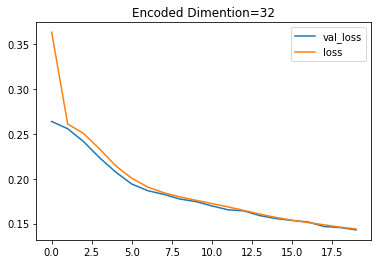

In [6]:
plt.clf()
a1,=plt.plot(history.history['val_loss'],label='val_loss')
a2,=plt.plot(history.history['loss'],label='loss') 
plt.title("Encoded Dimention="+"32")
plt.legend(handles=[a1,a2])
#    plt.legend(str(2+2*i)) #HillllO")    
plt.show()    

In [7]:
#dec_imgs=autoencoder.predict(x_train)
#(autoencoder, encoder, decoder)=AutoEncoderMLP(1, 784, [128,64,32])
Path='saved_models/Ezzat/weights.best.mnist.'+'encDim'+'32_3Layers'+'.hdf5'
autoencoder.load_weights(Path)
enc_imgs=encoder.predict(x_test)
dec_imgs=decoder.predict(enc_imgs)
#img=dec_imgs[2].reshape(28,28)
#xtest=x_test[2].reshape(28,28)

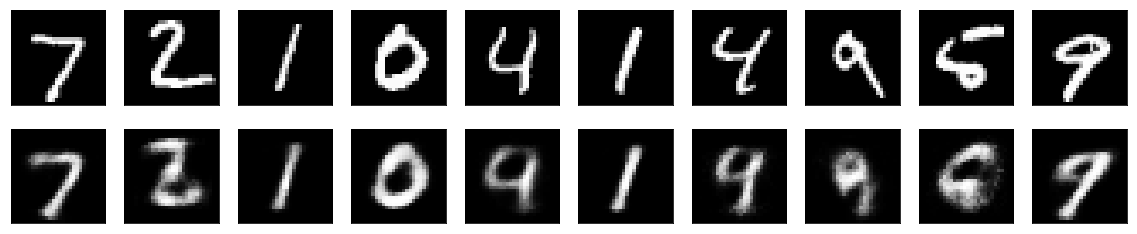

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
n=10
for i in range(n):
    ax=plt.subplot(2, n, i+1)
    xtest=x_test[i].reshape(28,28)
    plt.imshow(xtest)
    plt.gray()
    ax.get_xaxis().set_visible(False)    
    ax.get_yaxis().set_visible(False)        
    ax1=plt.subplot(2, n, n+i+1)    
    img=dec_imgs[i].reshape(28,28)
    plt.imshow(img)    
    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)    
plt.show()

### Going to encoded dimention and try to learn classes in encoded dimention ### 

In [12]:
encImgs_train=encoder.predict(x_train)
encImgs_test=encoder.predict(x_test)

In [ ]:
enc

## Unsupervised classification of encoded dimentions ## 
PCA/ICA/RNN 

In [26]:
from sklearn.decomposition import FastICA
ica=FastICA(10)
ica.fit(enc_imgs)#, tol=0.01)
ica.components_

array([[  4.36826324e-11,   3.84916705e-04,  -5.49128009e-04,
         -1.30393364e-04,   3.52995526e-04,  -3.13843765e-04,
         -2.34470759e-11,  -4.06236407e-04,  -3.02738490e-04,
         -4.17350330e-11,  -5.91228106e-04,  -3.02329750e-07,
         -8.26827186e-05,   8.74841857e-04,  -4.28508565e-04,
          4.55602982e-05,   8.10369330e-04,   7.56716226e-05,
          3.11126508e-04,  -2.39746521e-04,  -5.51182805e-05,
          7.86696327e-04,   4.04627163e-04,   8.76605021e-04,
         -2.41317571e-04,   7.18611665e-04,   1.15608278e-05,
         -3.33609747e-04,   5.40159145e-04,   5.93971510e-04,
          2.07854807e-04,   9.26517659e-04],
       [  8.45087497e-11,  -1.41822863e-04,   2.66487875e-04,
          5.65566702e-04,   3.56016957e-04,   1.10351174e-03,
          1.06908361e-11,   5.51131049e-04,  -3.60043628e-04,
         -2.05643239e-11,  -8.02241057e-06,  -2.11577392e-07,
         -1.57915446e-04,  -2.75317167e-04,  -3.32361522e-04,
         -5.16720744e-05,